# Display Sample Records

In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

**Specify your directory here:**

In [2]:
DIR = '/Users/abhi/Downloads/goodreads_reviews_spoiler.json'

**This function shows how to load datasets**

In [7]:
def load_data(file_name,maxcount):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (count > maxcount):
                break
    return data

In [10]:
df  = load_data('/Users/abhi/Downloads/goodreads_reviews_spoiler.json.gz',6500000)

In [11]:
df = pd.DataFrame(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378033 entries, 0 to 1378032
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id           1378033 non-null  object
 1   timestamp         1378033 non-null  object
 2   review_sentences  1378033 non-null  object
 3   rating            1378033 non-null  int64 
 4   has_spoiler       1378033 non-null  bool  
 5   book_id           1378033 non-null  object
 6   review_id         1378033 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 64.4+ MB


In [13]:
#Seleceting the books having spoiler
df = df[df['has_spoiler'] == True]

**Load and display sample records of books/authors/works/series**

In [17]:
df.shape

(89627, 7)

In [67]:
df=df.reset_index()

In [68]:
#Saving books having spoilers
df.to_csv('/Users/abhi/Downloads/goodreads_with_spoilers.csv')

In [29]:
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 89627 rows and 7 columns


In [69]:
df.head()

,index,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id
0,0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,"[[0, This is a special book.], [0, It started ...",5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb
1,2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,"[[0, A fun, fast paced science fiction thrille...",3,True,28684704,2ede853b14dc4583f96cf5d120af636f
2,4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,"[[0, I really enjoyed this book, and there is ...",4,True,25884323,332732725863131279a8e345b63ac33e
3,12,8842281e1d1347389f2ab93d60773d4d,2014-07-26,"[[0, What a fun series.], [0, I loved Wool, an...",4,True,17855756,9db60af739f79f40c0016b924a5326b4
4,20,8842281e1d1347389f2ab93d60773d4d,2014-07-26,"[[0, A fun fast paced book that sucks you in r...",4,True,13453029,46a6e1a14e8afc82d221fec0a2bd3dd0


In [83]:
#generating random choice my df
import random
def generate_user(df,bookcount):
    books=[]
    for i in range(bookcount):
        res = random.randint(1, df.shape[0])
        books.append([1,df['book_id'][res],df['rating'][res]])
    mydf=pd.DataFrame(books,columns=['user_id','book_id','rating'])
    return mydf
        
    

In [87]:
mydf=generate_user(df,10)

**Load and display sample records of user-book interactions (shelves)**

In [88]:
len(df['user_id'].unique())

16040

In [89]:
len(df['book_id'].unique())

24558

**Load and display similiar users who read one of the books as per our preference**

In [98]:
my_bookid= set(mydf['book_id'])

In [99]:
my_bookid


{'15714522',
 '16159833',
 '18221931',
 '18247580',
 '18660447',
 '20821111',
 '2282133',
 '24357334',
 '28862254',
 '4957350'}

In [92]:
df = df[df['book_id'].isin(my_bookid)]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 179 to 89049
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             182 non-null    int64 
 1   user_id           182 non-null    object
 2   timestamp         182 non-null    object
 3   review_sentences  182 non-null    object
 4   rating            182 non-null    int64 
 5   has_spoiler       182 non-null    bool  
 6   book_id           182 non-null    object
 7   review_id         182 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 11.6+ KB


**Load and display similiar records of users as per our book preference**

In [97]:
df.head()

,index,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id
179,3007,d8c86e725d683042e9eec675f294d7d4,2016-12-17,"[[0, I loved this book.], [0, The pace was jus...",4,True,20821111,e6600a216e50b53203c70307e80825cc
447,6927,1c845473e18c23f917126cb29bc8d243,2016-10-14,"[[0, This was a great first book.], [0, I love...",4,True,20821111,22b6339e2845d8c2ea6d1098dc02aed8
583,9146,d76881f6f75216d6f25479114c66b62c,2015-06-18,"[[0, I was given an ARC copy by the publisher ...",5,True,18660447,05ecac97fc28e29e5f5983d023718fd1
2701,42566,44f6eb8bb8e32716ab8e6f68b00c54ff,2013-10-08,"[[0, ARC Provided by Author for Honest Review]...",4,True,18221931,2e8a268b9f6adb7546036c58c3a57a88
3020,44643,607c94be8e31b66db06b4cf4420f9f0d,2015-05-20,"[[0, SOOOOO MANY FEEEEEEEEEEEEEEEEELLLLLLLLLLL...",5,True,2282133,0b0cbd57bac3d85e763a2ce0055e7502


In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df_sample_tsne) 

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 51499 samples in 0.025s...
[t-SNE] Computed neighbors for 51499 samples in 1.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 51499
[t-SNE] Computed conditional probabilities for sample 2000 / 51499
[t-SNE] Computed conditional probabilities for sample 3000 / 51499
[t-SNE] Computed conditional probabilities for sample 4000 / 51499
[t-SNE] Computed conditional probabilities for sample 5000 / 51499
[t-SNE] Computed conditional probabilities for sample 6000 / 51499
[t-SNE] Computed conditional probabilities for sample 7000 / 51499
[t-SNE] Computed conditional probabilities for sample 8000 / 51499
[t-SNE] Computed conditional probabilities for sample 9000 / 51499
[t-SNE] Computed conditional probabilities for sample 10000 / 51499
[t-SNE] Computed conditional probabilities for sample 11000 / 51499
[t-SNE] Computed conditional probabilities for sample 12000 / 51499
[t-SNE] Computed conditional probabilities for sam

[Text(0.5, 1.0, 'Goodreads Data T-SNE projection')]

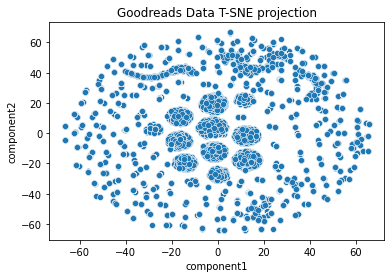

In [35]:
import seaborn as sns
df_tsne = pd.DataFrame()
df_tsne["book_id"] = df_sample['book_id']
df_tsne["component1"] = z[:,0]
df_tsne["component2"] = z[:,1]
df_tsne
sns.scatterplot(x="component1", y="component2", #hue=df_tsne.book_id.tolist(),
               #palette=sns.color_palette("hls"),
                data=df_tsne).set(title="Goodreads Data T-SNE projection") 